Credit: https://github.com/fastai/course22/blob/14a0f835d518447b4ba17685779758b0be5f77a5/06-why-you-should-use-a-framework.ipynb

In [ ]:
# Fastbook + relevant packages installation
! [ -e /content ] && pip install -Uqq fastbook kaggle

# Import the modules
import fastbook
# Setup the book
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.1 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
# Import the modules
from fastai.tabular.all import *
from fastbook import *

In [ ]:
# Create a kaggle folder
!mkdir ~/.kaggle
# Copy json file into the kaggle folder
!cp /content/gdrive/MyDrive/YouTube/kaggle.json ~/.kaggle/
# Give full read & write permission only to the owner
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Declare the dataset name
name = "titanic"
# Declare the dataset path
path = URLs.path(url=name); path

Path('/root/.fastai/archive/titanic')

In [ ]:
# Import the modules
from kaggle import api

# If the path does not exist
if not path.exists():
    # Create it
    path.mkdir(parents=true)
    # Download the dataset to the set path
    api.competition_download_cli(competition=name, path=path)
    # Unzip the file
    shutil.unpack_archive(str(path/f"{name}.zip"), str(path))

# Trace
path.ls(file_type="text")

100%|██████████| 34.1k/34.1k [00:00<00:00, 1.58MB/s]

(#3) [Path('/root/.fastai/archive/titanic/gender_submission.csv'),Path('/root/.fastai/archive/titanic/train.csv'),Path('/root/.fastai/archive/titanic/test.csv')]

In [ ]:
# Load the train data
train = pd.read_csv(path/"train.csv"); train.sample(n=5, random_state=43)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S


In [ ]:
def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    """
    Performs feature engineering on a given DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to perform feature engineering on.

    Returns:
        A pandas.DataFrame with the new engineered features.

    Raises:
        None

    This function performs feature engineering on the input DataFrame by creating new columns based on existing ones.
    It creates a "Deck" column based on the first letter of the "Cabin" column, mapping it to one of three categories
    ("ABC", "DE", "FG"). It creates a "Family" column by summing the "SibSp" and "Parch" columns. It creates an "Alone"
    column by checking whether the "Family" column is equal to 1. Finally, it creates a "Title" column by extracting
    the title from the "Name" column. The function returns the input DataFrame with the new engineered features.

    Credit: https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial/
    """
    # Deck mapping
    df.loc[:, "Deck"] = df.Cabin.str[0].map(dict(
        A="ABC",
        B="ABC",
        C="ABC",
        D="DE",
        E="DE",
        F="FG",
        G="FG"
    ))
    # Family Declaration
    df.loc[:, "Family"] = df.SibSp + df.Parch
    # Whether alone
    df.loc[:, "Alone"] = df.Family == 1
    # Title expansion
    df.loc[:, "Title"] = df.Name.str.split(", ", expand=True)[1]\
                                .str.split(".", expand=True)[0]
    # Return the frame with new features
    return df


# Test the function
train = feature_engineering(df=train); train.sample(n=5, random_state=43)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family,Alone,Title
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S,NaN,0,False,Mr
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,DE,1,True,Miss
144,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.0,0,0,231945,11.5000,NaN,S,NaN,0,False,Mr
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S,NaN,0,False,Miss
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S,NaN,6,False,Master


In [ ]:
# Declare a seed for reproducibility
set_seed(s=43, reproducible=True)

In [ ]:
# Declare a Dataloader over TabularPandas object
to = TabularPandas(df=train,
                   procs=[Categorify, FillMissing, Normalize],
                   cat_names=["Sex","Pclass","Embarked","Deck", "Title"],
                   cont_names=["Age", "SibSp", "Parch", "Alone", "Family"],
                   y_names="Survived", y_block = CategoryBlock(),
                   splits=RandomSplitter(valid_pct=0.3, seed=43)(o=train))
# To DataLoaders object
dls = to.dataloaders()

In [ ]:
# Save pickle of TabularPandas
save_pickle(fn="/content/gdrive/MyDrive/YouTube/mLPlaylist/titanic-fastai-to.pkl",
            o=to)

In [ ]:
# Trace
to.show(max_n=5, random_state=43)

,Sex,Pclass,Embarked,Deck,Title,Age_na,Age,SibSp,Parch,Alone,Family,Survived
847,male,3,C,#na#,Mr,False,35.0,0.0,0.0,0.0,0.0,0
823,female,3,S,DE,Mrs,False,27.0,0.0,1.0,1.0,1.0,1
775,male,3,S,#na#,Mr,False,18.0,0.0,0.0,0.0,0.0,0
109,female,3,Q,#na#,Miss,True,29.0,1.0,0.0,1.0,1.0,1
26,male,3,C,#na#,Mr,True,29.0,0.0,0.0,0.0,0.0,0


In [ ]:
# To get the data for machine learning approaches
# outside the fastai solutions
X_train, y_train = to.train.xs, to.train.ys.values.ravel() # Training
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel() # Validation

# Trace
X_train.shape, y_train.shape

((624, 11), (624,))

In [ ]:
round(train.Survived.value_counts() / len(train), 2)

0    0.62
1    0.38
Name: Survived, dtype: float64

SuggestedLRs(slide=0.10000000149011612, valley=0.009120108559727669)

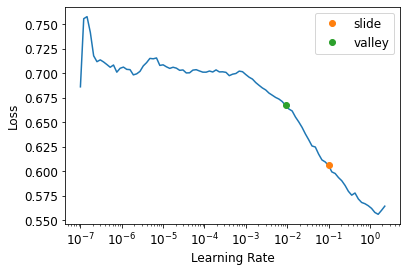

In [ ]:
# Declare a tabular learner
learn = tabular_learner(dls=dls,
                        layers=[50, 10],
                        metrics=[accuracy, F1Score(average="micro")])
# Find the optimum learning rate
learn.lr_find(suggest_funcs=(slide, valley))

In [ ]:
# Fit the model
learn.fit(n_epoch=20, lr=0.03,
          cbs=[SaveModelCallback,
               ReduceLROnPlateau,
               EarlyStoppingCallback(patience=5)])

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.545924,0.561879,0.734082,0.734082,00:00
1,0.486975,0.498397,0.812734,0.812734,00:00
2,0.445502,0.430985,0.812734,0.812734,00:00
3,0.426998,0.455150,0.835206,0.835206,00:00
4,0.412385,0.449891,0.823970,0.823970,00:00
5,0.399750,0.449670,0.820225,0.820225,00:00
6,0.388755,0.448790,0.820225,0.820225,00:00
7,0.383135,0.449476,0.820225,0.820225,00:00


Better model found at epoch 0 with valid_loss value: 0.5618786811828613.
Better model found at epoch 1 with valid_loss value: 0.49839743971824646.
Better model found at epoch 2 with valid_loss value: 0.43098464608192444.
Epoch 3: reducing lr to 0.003
Epoch 4: reducing lr to 0.00030000000000000003
Epoch 5: reducing lr to 3.0000000000000004e-05
Epoch 6: reducing lr to 3.0000000000000005e-06
Epoch 7: reducing lr to 3.0000000000000004e-07
No improvement since epoch 2: early stopping


In [ ]:
# Load the test data
test = pd.read_csv(path/"test.csv"); test.sample(n=5, random_state=43)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
345,1237,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.650,NaN,S
207,1099,2,"Collett, Mr. Sidney C Stuart",male,24.0,0,0,28034,10.500,NaN,S
165,1057,3,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",female,26.0,1,1,315153,22.025,NaN,S
20,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.400,NaN,C
396,1288,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.250,NaN,Q


In [ ]:
# Apply the feature engineering to the test set
test = feature_engineering(df=test); test.sample(n=5, random_state=43)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Family,Alone,Title
345,1237,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.650,NaN,S,NaN,0,False,Miss
207,1099,2,"Collett, Mr. Sidney C Stuart",male,24.0,0,0,28034,10.500,NaN,S,NaN,0,False,Mr
165,1057,3,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",female,26.0,1,1,315153,22.025,NaN,S,NaN,2,False,Mrs
20,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.400,NaN,C,NaN,1,True,Mr
396,1288,3,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.250,NaN,Q,NaN,0,False,Mr


In [ ]:
# Necessary transformations for the modeling
tst_dl = learn.dls.test_dl(test_items=test)
# Predict the results
preds, _ = learn.get_preds(dl=tst_dl)

In [ ]:
preds[:5, :1]

tensor([[0.8883],
        [0.4566],
        [0.9247],
        [0.8881],
        [0.4449]])

In [ ]:
# Assign the predictions into the test frame
test.loc[:, "Survived"] = (preds[:, 1] > .5).int()
# Only take "PassengerId", and "Survived" columns
test.loc[:, ["PassengerId", "Survived"]].to_csv("/content/fastai-submission.csv",
                                                index=False)

In [ ]:
# Trace
test.loc[:, ["PassengerId", "Survived"]].sample(n=5, random_state=43)

,PassengerId,Survived
345,1237,1
207,1099,0
165,1057,1
20,912,0
396,1288,0


In [ ]:
# !kaggle competitions submit -c titanic -f /content/fastai-submission.csv -m wai-fastai-submission

# Grid Search

In [ ]:
def learner_fit(layers: list) -> tabular_learner:
    """
    Creates a tabular learner and fits it to the data using the given layers.

    Args:
        layers (list): A list of integers representing the size of each layer.

    Returns:
        A tabular_learner object that has been fitted to the data.

    Raises:
        None
    """
    # Declare a tabular learner
    learn = tabular_learner(dls=dls,
                            layers=layers,
                            metrics=[accuracy])
    # With no bar
    with learn.no_mbar():
        # Retrieve the suggested learning rates
        suggestedLRs = learn.lr_find(suggest_funcs=(slide, valley))
        # Calculate the average of it
        lr = round((suggestedLRs[0] + suggestedLRs[1]) / 2, 2)
        # Trace
        print("Learning rate:", lr)
        # Fit the model
        learn.fit(n_epoch=50, lr=lr,
                  cbs=[SaveModelCallback(monitor="valid_loss"),
                       ReduceLROnPlateau(patience=3),
                       EarlyStoppingCallback(patience=10)])
    # Return the learner
    return learn

-------TRAINING [200, 100]-------


Learning rate: 0.01


Better model found at epoch 0 with valid_loss value: 0.6710293889045715.


Better model found at epoch 1 with valid_loss value: 0.5190136432647705.


Better model found at epoch 2 with valid_loss value: 0.4796285331249237.


Better model found at epoch 3 with valid_loss value: 0.47472691535949707.


Better model found at epoch 4 with valid_loss value: 0.4732203185558319.


Better model found at epoch 6 with valid_loss value: 0.46767356991767883.


Better model found at epoch 7 with valid_loss value: 0.4638001322746277.


Better model found at epoch 8 with valid_loss value: 0.46078839898109436.


Epoch 11: reducing lr to 0.001


Epoch 14: reducing lr to 0.0001


Epoch 17: reducing lr to 1e-05


No improvement since epoch 8: early stopping


-------------------------------

-------TRAINING [100, 50]-------


Learning rate: 0.02


Better model found at epoch 0 with valid_loss value: 0.602412760257721.


Better model found at epoch 1 with valid_loss value: 0.48433917760849.


Better model found at epoch 2 with valid_loss value: 0.4477555751800537.


Epoch 5: reducing lr to 0.002


Epoch 8: reducing lr to 0.0002


Epoch 11: reducing lr to 2e-05


No improvement since epoch 2: early stopping


-------------------------------

-------TRAINING [100, 50, 20]-------


Learning rate: 0.02


Better model found at epoch 0 with valid_loss value: 0.5991743206977844.


Better model found at epoch 1 with valid_loss value: 0.46728020906448364.


Better model found at epoch 3 with valid_loss value: 0.4333822429180145.


Epoch 6: reducing lr to 0.002


Epoch 9: reducing lr to 0.0002


Epoch 12: reducing lr to 2e-05


No improvement since epoch 3: early stopping


-------------------------------

-------TRAINING [100, 20]-------


Learning rate: 0.03


Better model found at epoch 0 with valid_loss value: 0.5624163746833801.


Better model found at epoch 1 with valid_loss value: 0.4883236587047577.


Better model found at epoch 3 with valid_loss value: 0.4850354790687561.


Better model found at epoch 5 with valid_loss value: 0.44782036542892456.


Epoch 8: reducing lr to 0.003


Epoch 11: reducing lr to 0.00030000000000000003


Epoch 14: reducing lr to 3.0000000000000004e-05


No improvement since epoch 5: early stopping


-------------------------------

-------TRAINING [50, 20, 10]-------


Learning rate: 0.03


Better model found at epoch 0 with valid_loss value: 0.6344264149665833.


Better model found at epoch 1 with valid_loss value: 0.5048192143440247.


Better model found at epoch 2 with valid_loss value: 0.47907257080078125.


Better model found at epoch 3 with valid_loss value: 0.4392232894897461.


Better model found at epoch 4 with valid_loss value: 0.4323141872882843.


Epoch 7: reducing lr to 0.003


Epoch 10: reducing lr to 0.00030000000000000003


Epoch 13: reducing lr to 3.0000000000000004e-05


No improvement since epoch 4: early stopping


-------------------------------

-------TRAINING [50, 10]-------


Learning rate: 0.05


Better model found at epoch 0 with valid_loss value: 0.6507822275161743.


Better model found at epoch 1 with valid_loss value: 0.519799530506134.


Better model found at epoch 2 with valid_loss value: 0.45462605357170105.


Better model found at epoch 5 with valid_loss value: 0.43685466051101685.


Better model found at epoch 8 with valid_loss value: 0.4293162524700165.


Epoch 11: reducing lr to 0.005


Epoch 14: reducing lr to 0.0005


Epoch 17: reducing lr to 5e-05


No improvement since epoch 8: early stopping


-------------------------------

-------TRAINING [20, 10]-------


Learning rate: 0.07


Better model found at epoch 0 with valid_loss value: 0.5816200375556946.


Better model found at epoch 1 with valid_loss value: 0.5284968018531799.


Better model found at epoch 2 with valid_loss value: 0.5050724148750305.


Better model found at epoch 3 with valid_loss value: 0.4775312542915344.


Better model found at epoch 4 with valid_loss value: 0.4233970046043396.


Better model found at epoch 6 with valid_loss value: 0.41984596848487854.


Epoch 9: reducing lr to 0.007000000000000001


Better model found at epoch 12 with valid_loss value: 0.4191693365573883.


Better model found at epoch 13 with valid_loss value: 0.4160298705101013.


Epoch 16: reducing lr to 0.0007000000000000001


Epoch 19: reducing lr to 7.000000000000001e-05


Epoch 22: reducing lr to 7.000000000000001e-06


No improvement since epoch 13: early stopping


-------------------------------

-------TRAINING [10, 10]-------


Learning rate: 0.04


Better model found at epoch 0 with valid_loss value: 0.6038992404937744.


Better model found at epoch 1 with valid_loss value: 0.5052244067192078.


Better model found at epoch 2 with valid_loss value: 0.46606260538101196.


Better model found at epoch 4 with valid_loss value: 0.43229439854621887.


Better model found at epoch 5 with valid_loss value: 0.4136955738067627.


Epoch 8: reducing lr to 0.004


Epoch 11: reducing lr to 0.0004


Epoch 14: reducing lr to 4e-05


No improvement since epoch 5: early stopping


-------------------------------

[10, 10]
TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(4, 3)
    (2): Embedding(4, 3)
    (3): Embedding(4, 3)
    (4): Embedding(18, 8)
    (5): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=28, out_features=10, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=10, out_features=10, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=10, out_features=2, bias=True)
    )
  )
)


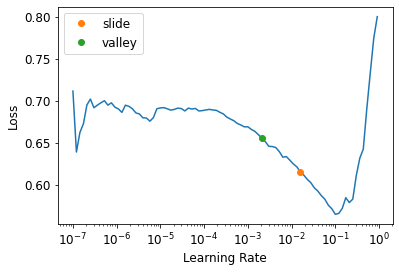

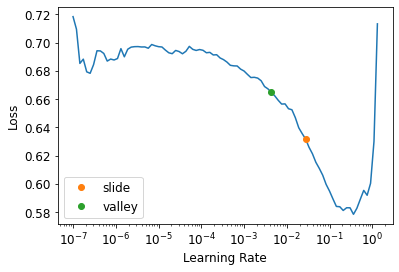

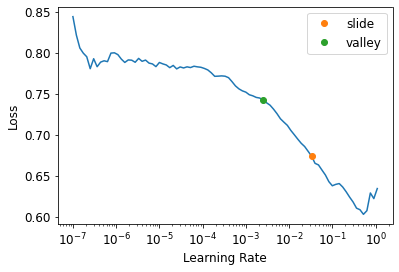

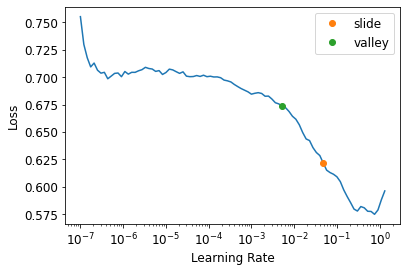

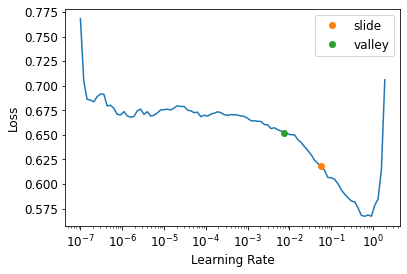

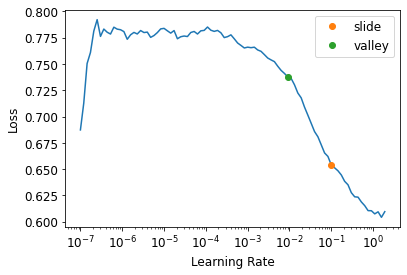

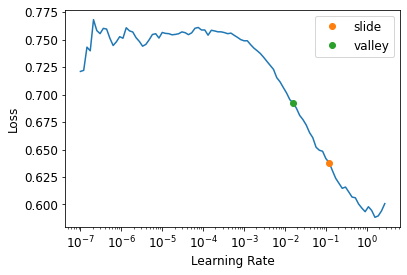

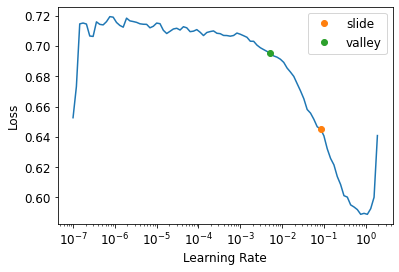

In [ ]:
# Declare different layers for model constructions
layers = [
    [200, 100],
    [100, 50],
    [100, 50, 20],
    [100, 20],
    [50, 20, 10],
    [50, 10],
    [20, 10],
    [10, 10]
]


def tabular_search(layers: list) -> tuple:
    """
    Searches for the best Tabular Learner model with the given layers.

    Args:
        layers (list): A list of lists, where each list represents a set of layer sizes for a Tabular Learner.

    Returns:
        A tuple with two elements:
        - The best Tabular Learner model that was found during the search.
        - The set of layer sizes that resulted in the best Tabular Learner model.

    Raises:
        None
    """
    # Best learner tracker
    best_acc = 0.

    # Iterate through the layers
    for layer in layers:
        # Trace the session
        print(f"-------TRAINING {layer}-------")
        # Train a Tabular Learner with given layers
        learner = learner_fit(layers=layer)
        # If the accuracy is higher than the previous best learner
        if learner.validate()[1] > best_acc:
            # Assign it as the best model
            best_model = learner
            # Trace
            best_layers = layer
        print("-------------------------------\n")
    # Return the best model and layers
    return (best_model, best_layers)


# Test the function
best_model, best_layers = tabular_search(layers=layers)
# Trace the results
print(best_layers)
print(best_model.model)